In [0]:
csv = "https://raw.githubusercontent.com/andybbruno/DataMining/master/kids_train_cleaned.csv?token=AI2AUEZD2UYE6LZGAQGECUK6B4TIU"

In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(csv)
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,AAAP,AACP,ARAP,ARCP,CAAP,CACP,CRAP,CRCP,BYRNO,VNST,VehBCost,WarrantyCost,PurchYear,PurchMonth,PurchDay,PurchWeekDay,EngineLiters,NumCylinders,4X4,WheelDrive,NumDoors,PCA1,PCA2
0,326,1,10/25/2010,ADESA,2008.0,2.0,KIA,SPECTRA,EX,SEDAN,BLUE,AUTO,Covers,61184,KOREAN,6796.0,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,5546,FL,6100.0,533,2010.0,10.0,25.0,Monday,4.11398,5.0,0,0,4.0,1797.080405,-753.566708
1,42991,0,5/27/2009,MANHEIM,2006.0,3.0,CHRYSLER,STRATUS,SXT,SEDAN,SILVER,AUTO,Covers,92383,AMERICAN,5480.0,6461.0,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,99750,FL,4000.0,1630,2009.0,5.0,27.0,Wednesday,2.70000,6.0,0,0,4.0,-4879.356480,1637.798453
2,55273,0,3/18/2010,OTHER,2008.0,2.0,CHRYSLER,CALIBER,SE,WAGON,BLACK,AUTO,Covers,45965,AMERICAN,8067.0,8580.0,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,99761,OK,7500.0,693,2010.0,3.0,18.0,Thursday,2.31289,6.0,0,0,4.0,4349.541129,-467.358818
3,29058,0,6/8/2009,OTHER,2005.0,4.0,FORD,FREESTAR,S,MINIVAN,BROWN,AUTO,Covers,80169,AMERICAN,4817.0,6658.0,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,99761,AZ,4725.0,1633,2009.0,6.0,8.0,Monday,3.90000,6.0,NO,Front,5.0,-5514.286888,1633.449461
4,34991,0,3/4/2009,MANHEIM,2005.0,4.0,CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,BLUE,AUTO,Alloy,77372,AMERICAN,5430.0,6633.0,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,20833,TX,5670.0,1623,2009.0,3.0,4.0,Wednesday,3.30000,4.0,NO,Front,5.0,-4594.389176,1693.004506


In [0]:
df_clus = df[['VehBCost', 'WarrantyCost', 'VehOdo']]

In [0]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_clus.values)

In [0]:
res = KMeans(n_clusters=6).fit(scaled_df)

In [0]:
x_ = 'VehBCost'
y_ = 'WarrantyCost'
z_ = 'VehOdo'

In [8]:
centers = scaler.inverse_transform(res.cluster_centers_)
print(centers)

[[ 6527.50407814  1903.46823505 88359.6655612 ]
 [ 6815.26735558   844.96029802 47616.00010206]
 [ 6443.60922387   986.64409845 82626.83769757]
 [ 6675.24160778   966.11919966 64615.12771392]
 [ 7266.65900103  1665.92623796 73453.22850757]
 [ 5303.78137652  4690.24696356 77295.43724696]]


In [9]:
fig = go.Figure(data=[go.Scatter3d(
    x=df[x_],
    y=df[y_],
    z=df[z_],
    mode='markers',
    marker=dict(
        size=2,
        color=res.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x_,
                     yaxis_title= y_,
                     zaxis_title= z_)
                 )
fig.show()

In [10]:
fig = go.Figure(data=[go.Scatter3d(
    x=df[x_],
    y=df[y_],
    z=df[z_],
    mode='markers',
    marker=dict(
        size=2,
        color=res.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x_,
                     yaxis_title= y_,
                     zaxis_title= z_)
                 )
fig.show()

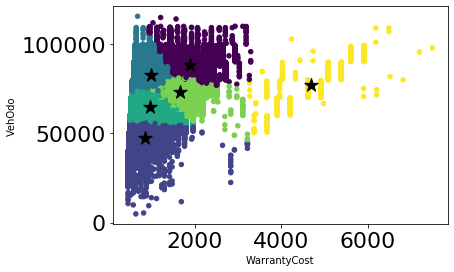

In [11]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehOdo'], c=res.labels_, 
            s=20)
plt.scatter(centers[:, 1], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('WarrantyCost')
plt.ylabel('VehOdo')
plt.show()

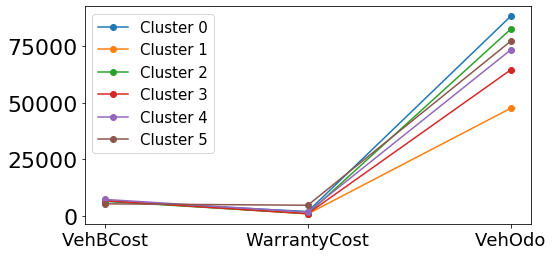

In [12]:
plt.figure(figsize=(8, 4))
col = df_clus.columns
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(col)), col, fontsize=18)
plt.legend(fontsize=15)
plt.show()

In [0]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = res.labels_

In [0]:
bad = []
good = []
for i in range (0,6):
  points = df.iloc[np.where(res.labels_==i)]
  bad.append(len(points[points['IsBadBuy'] == 1]))
  good.append(len(points[points['IsBadBuy'] == 0]))
labels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']

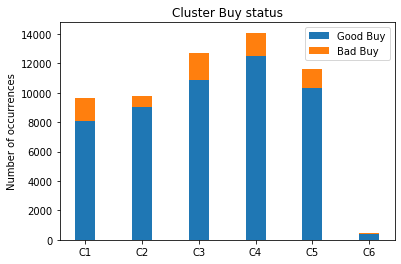

In [19]:
N = 6
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, good, width)
p2 = plt.bar(ind, bad, width,
             bottom=good)

plt.ylabel('Number of occurrences')
plt.title('Cluster Buy status')
plt.xticks(ind, labels)
plt.yticks(np.arange(0, 15000, 2000))
plt.legend((p1[0], p2[0]), ('Good Buy', 'Bad Buy'))

plt.show()